In [28]:
""" Importing python libraries for performing data analysis"""
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import folium as fl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import requests
import json

In [2]:
"""Reading .csv file using pandas function to get the idea on the dataset

For extracting data in other extension files, refer Pandas documentation

Reading file will enable to perform pre-processing and data-cleaning

"""
df = pd.read_csv("/content/drive/MyDrive/Datasets/food_coded.csv")
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
""" Getting basic information on the dataset

Performing this will know which columns to eliminate in order to perform required data analysis on the dataset

"""
print("Size of the table ===================================\n", df.shape,"\n")
print("Info on data type of table ===================================")
df.info()

Size of the table ===================================
 (125, 61) 

Info on data type of table ===================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float6

In [4]:
"""Data Cleaning process - removal of unwanted columns

"""
database = df.loc[:,['cook','eating_out','employment','ethnic_food','exercise',
                     'fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
database.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


In [5]:
""" Getting basic information on the updates dataset

Performing this will know which columns to eliminate in order to perform required data analysis on the dataset

"""
print("Size of the table ===================================\n", database.shape,"\n")
print("Info on data type of table ===================================")
database.info()

Size of the table ===================================
 (125, 11) 

Info on data type of table ===================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [6]:
"""Data Cleaning process - removal of NAN values

Trimming won't be needed as data types either int or float

"""
updated_df = database.dropna()
updated_df.shape

(100, 11)

<Axes: >

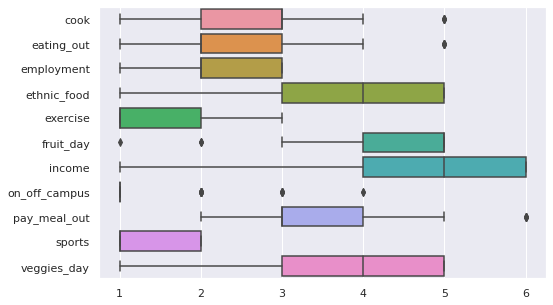

In [7]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.boxplot(updated_df, orient="h")

In [8]:
#sns.set(rc={"figure.figsize":(8, 8)})
#sns.violinplot(updated_df, orient="h")

<Axes: >

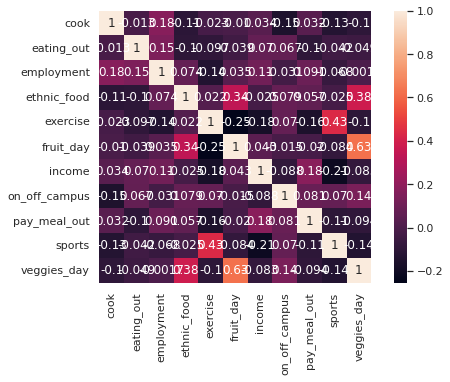

In [9]:
"""Based on box plot, creating a heatmap to get feature correlation
"""
sns.heatmap(updated_df.corr(), annot=True, square=True)

In [10]:
"""Next step is to remove outliers in the dataset and 
highly correlated features and updating the dataset

and scaling the dataset to run KMeans on that
"""
is_inliner = (np.abs(stats.zscore(updated_df)) < 2).all(axis=1)
updated_df = updated_df[is_inliner]

<Axes: >

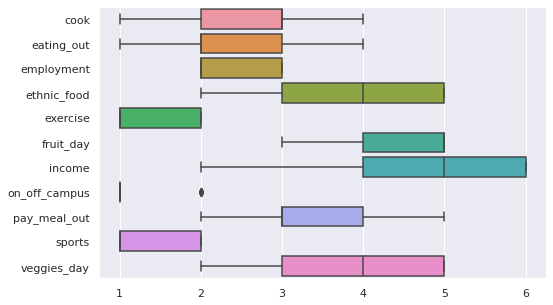

In [11]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.boxplot(updated_df, orient="h")

In [12]:
log_updated_df = np.log(updated_df)
scaler = StandardScaler()
scaled_df_array = scaler.fit_transform(log_updated_df)
scaled_df = pd.DataFrame(scaled_df_array, 
                         columns=updated_df.columns, 
                         index=updated_df.index)

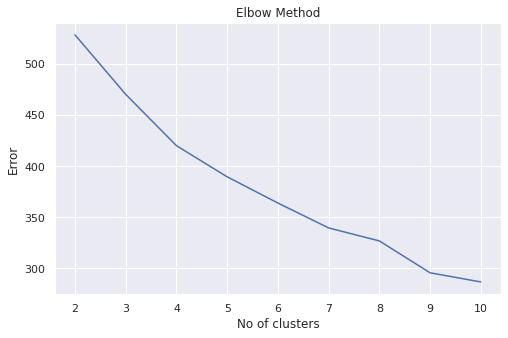

In [13]:
""" Creating clusters on the data available and selecting number of clusters
using Elbow Method
"""
cluster_number= list(range(2,11))
error = []
for i in cluster_number:
  kmeans = KMeans(n_clusters=i, n_init=10, init = 'k-means++', 
                  random_state = 42);
  y_kmeans = kmeans.fit(scaled_df);
  error.append(kmeans.inertia_);
plt.plot(cluster_number, error)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("Error")
plt.show()

In [14]:
"""Above plot is having an issue as it is not showing a proper elbow

Implementing silhotte score to get proper cluster number
"""

'Above plot is having an issue as it is not showing a proper elbow\n\nImplementing silhotte score to get proper cluster number\n'

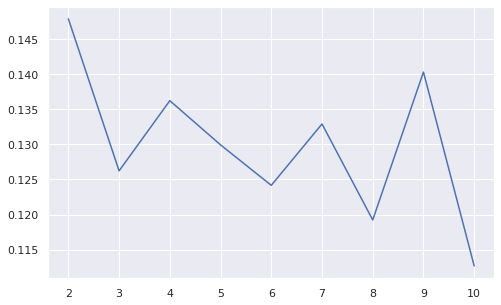

In [15]:
silhouette_avg = []
for i in cluster_number:
  kmeans = KMeans(n_clusters=i, n_init=10, init = 'k-means++', 
                  random_state = 42);
  kmeans.fit(scaled_df);
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))
plt.plot(cluster_number, silhouette_avg)

In [16]:
# From above, we select the number of clusters to be 4

In [207]:
"""Getting Geolocation API from FourSquare and performing data cleaning

1. Selecting the residential buildings near the point selected in the url with 3 km radius
"""
url = "https://api.foursquare.com/v3/places/search?ll=19.2502236%2C73.1429037&radius=4000&categories=12094&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3qrZnDve6+flvaAsxm1kQww14SSufWTnOhZAJLdWubaI="
}

response = requests.request("GET", url, headers=headers)

In [208]:
result = response.json()['results']

In [209]:
residential_dataset = pd.DataFrame(result)

In [210]:
residential_dataset

,fsq_id,categories,chains,distance,geocodes,link,location,name,related_places,timezone
0,506955aae4b0e077621935b2,"[{'id': 12094, 'name': 'Residential Building',...",[],255,"{'main': {'latitude': 19.252546, 'longitude': ...",/v3/places/506955aae4b0e077621935b2,"{'address': 'Khadakpada', 'country': 'IN', 'cr...",Sanghavi Estate,{},Asia/Kolkata
1,4f09a9a4e4b071c576bc78b2,"[{'id': 12094, 'name': 'Residential Building',...",[],588,"{'main': {'latitude': 19.256889, 'longitude': ...",/v3/places/4f09a9a4e4b071c576bc78b2,"{'address': 'Singhal Road', 'country': 'IN', '...",Mohan Park,{},Asia/Kolkata
2,4f0ac34be4b0d6422d2e2d15,"[{'id': 12094, 'name': 'Residential Building',...",[],622,"{'main': {'latitude': 19.243849, 'longitude': ...",/v3/places/4f0ac34be4b0d6422d2e2d15,"{'country': 'IN', 'cross_street': '', 'formatt...",Ammu Chambers,{},Asia/Kolkata
3,4ff933e3e4b054fbab492065,"[{'id': 12094, 'name': 'Residential Building',...",[],869,"{'main': {'latitude': 19.257492, 'longitude': ...",/v3/places/4ff933e3e4b054fbab492065,"{'country': 'IN', 'cross_street': '', 'formatt...",Madhav Sausar,{},Asia/Kolkata
4,4f54193ce4b09f74b97934cc,"[{'id': 12094, 'name': 'Residential Building',...",[],885,"{'main': {'latitude': 19.242814, 'longitude': ...",/v3/places/4f54193ce4b09f74b97934cc,"{'address': 'Karnik Road', 'country': 'IN', 'c...",St Joseph's Colony,{},Asia/Kolkata
5,520c787011d20fbc0202fd38,"[{'id': 12094, 'name': 'Residential Building',...",[],887,"{'main': {'latitude': 19.257503, 'longitude': ...",/v3/places/520c787011d20fbc0202fd38,"{'address': 'Godrej Park', 'country': 'IN', 'c...",Godrej Park,{},Asia/Kolkata
6,4e5e2f88aeb78833bb885ad5,"[{'id': 12094, 'name': 'Residential Building',...",[],901,"{'main': {'latitude': 19.258344, 'longitude': ...",/v3/places/4e5e2f88aeb78833bb885ad5,"{'address': 'Khadakpada', 'country': 'IN', 'cr...",Godrej Hills,{'children': [{'fsq_id': '5a62f836791871187b2b...,Asia/Kolkata
7,4de260c2d22d2a4ecdc3b893,"[{'id': 12094, 'name': 'Residential Building',...",[],948,"{'main': {'latitude': 19.242338, 'longitude': ...",/v3/places/4de260c2d22d2a4ecdc3b893,"{'country': 'IN', 'cross_street': '', 'formatt...",Regency Park II,{},Asia/Kolkata
8,506c5762e4b02fc3c4478a28,"[{'id': 12094, 'name': 'Residential Building',...",[],997,"{'main': {'latitude': 19.246133, 'longitude': ...",/v3/places/506c5762e4b02fc3c4478a28,"{'address': 'Anupam', 'country': 'IN', 'cross_...",Anupam Nagar,{},Asia/Kolkata
9,4e477437d4c065cb6bade6ef,"[{'id': 12094, 'name': 'Residential Building',...",[],1042,"{'main': {'latitude': 19.256502, 'longitude': ...",/v3/places/4e477437d4c065cb6bade6ef,"{'country': 'IN', 'cross_street': '', 'formatt...",Mohan Pride,{},Asia/Kolkata


In [211]:
"""Now, querying for each geographical points obtained for each residential building

Searching for gyms, restaurants, grocery stores (restaurant selected are indian)
Calling API for each geographical location
"""
def count_amenities(ll, lg):
  restaurant_url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius=700&categories=13199&limit=50".format(ll,lg)
  fruits_vegetables_url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius=700&categories=18021%2C17069%2C17067&limit=50".format(ll,lg)
  headers = {
    "accept": "application/json",
    "Authorization": "fsq3qrZnDve6+flvaAsxm1kQww14SSufWTnOhZAJLdWubaI="
  }
  restaurant_response = requests.request("GET", restaurant_url, headers=headers)
  restaurant_result = restaurant_response.json()['results']

  fruits_response = requests.request("GET", fruits_vegetables_url, headers=headers)
  fruits_result = fruits_response.json()['results']
  return len(restaurant_result), len(fruits_result)

In [212]:
latitude = []
longitude = []
restaurants = []
groceries = []
for i in range(50):
  main = residential_dataset.loc[:,['geocodes']].iloc[i,:].values[0].get('main')
  ll = main.get('latitude')
  lg = main.get('longitude')
  res_count, grocer_count = count_amenities(ll, lg)
  latitude.append(ll)
  longitude.append(lg)
  restaurants.append(res_count)
  groceries.append(grocer_count)

In [213]:
updated_df = pd.DataFrame(data = {'latitude':latitude, 'longitude': longitude, 'restaurants': restaurants, 'food_stores': groceries})

In [214]:
updated_df['name'] = residential_dataset['name']

In [215]:
updated_df

,latitude,longitude,restaurants,food_stores,name
0,19.252546,73.142995,17,9,Sanghavi Estate
1,19.256889,73.140810,13,8,Mohan Park
2,19.243849,73.142764,14,4,Ammu Chambers
3,19.257492,73.139721,15,7,Madhav Sausar
4,19.242814,73.139502,5,4,St Joseph's Colony
5,19.257503,73.146182,7,4,Godrej Park
6,19.258344,73.142674,12,5,Godrej Hills
7,19.242338,73.139904,5,4,Regency Park II
8,19.246133,73.151245,7,3,Anupam Nagar
9,19.256502,73.135428,17,5,Mohan Pride


In [263]:
applied_df = updated_df.loc[:,['restaurants', 'food_stores']]

In [264]:
""" Using K Means on the geographical dataset generated above
"""
scaler = StandardScaler()
scaled_df_array = scaler.fit_transform(applied_df)
scaled_df = pd.DataFrame(scaled_df_array, 
                         columns=applied_df.columns, 
                         index=applied_df.index)
kmeans = KMeans(n_clusters=4, n_init=10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit(scaled_df)

In [265]:
cluster_label = y_kmeans.labels_
print(cluster_label)
colors = ["red", "green", "blue", "orange"]

[0 0 0 0 2 2 0 2 2 0 2 0 0 2 0 0 2 2 3 3 3 0 2 3 0 3 2 2 1 0 1 2 0 2 1 2 2
 2 0 0 2 0 2 1 1 2 2 3 0 2]


In [266]:
"""Using Folim to plot clusters in Map
"""
m = fl.Map(location=[19.2502236, 73.1429037], zoom_start = 21)
for i in range(50):
  ll = updated_df.loc[i,['latitude']]
  lg = updated_df.loc[i,['longitude']]
  name = updated_df.loc[i,['name']]
  fl.Marker(location=[ll, lg], popup=name, 
            icon=fl.Icon(color=colors[cluster_label[i]])).add_to(m)

In [267]:
m